In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from actTools import *

### 1. 前処理

■1-1. "effective_data.csv"を読み込み，データフレーム`df`に格納する。

In [2]:
df = pd.read_csv("effective_data.csv")
df

t   a1x   a1y   a1z  o1x    o1y    o1z   ch11   ch12   a2x  \
0       58208121 -8719 -4022 -2877  264  424.0    7.0 -25838  24587 -9026   
1       58208122 -8702 -4005 -2931  258  417.0    7.0 -32203  32767 -9019   
2       58208123 -8719 -4046 -2933  252  405.0   -5.0 -32768  32767 -9011   
3       58208124 -8743 -4037 -2982  246  405.0    1.0 -32768  32767 -9026   
4       58208125 -8746 -4056 -2977  258  399.0    7.0 -32768  32767 -9045   
...          ...   ...   ...   ...  ...    ...    ...    ...    ...   ...   
241848  58449969 -9017 -3580 -2508 -771 -594.0 -626.0    266    264 -9355   
241849  58449970 -9014 -3565 -2538 -777 -582.0 -620.0    262    256 -9363   
241850  58449971 -9014 -3551 -2530 -771 -594.0 -632.0    244    270 -9346   
241851  58449972 -8978 -3563 -2506 -771 -612.0 -632.0    242    269 -9336   
241852  58449973 -8958 -3553 -2535 -771 -618.0 -632.0    251    271 -9333   

         a2y   a2z  o2x    o2y    o2z   ch21   ch22  
0       1661 -3195  410  425.0   63.0  32767  17788  
1       1632 -3190  404  419.0   70.0  32767  15536  
2       1651 -3217  385  425.0   70.0  30643  15384  
3       1629 -3209  367  444.0   63.0  25746  15539  
4       1590 -3222  373  450.0   63.0  20410  14988  
...      ...   ...  ...    ...    ...    ...    ...  
241848  1612 -2624 -906  322.0 -887.0    634    338  
241849  1619 -2536 -906  310.0 -893.0    638    354  
241850  1619 -2526 -894  303.0 -899.0    627    363  
241851  1571 -2538 -888  303.0 -893.0    624    361  
241852  1544 -2526 -870  303.0 -899.0    635    359  

[241853 rows x 17 columns]

> 計測は241.825秒つまり，4分1.828秒。

■1-2. 計測のすべての時間について運動や筋電位差が有効であることはない。計測開始時には止まっている部位が動き出し，計測終了時には動いている部位が璐丸からである。したがって，運動部位の運動や筋電位差が比較的安定な時刻でデータを着ることからはじめる。それについては，計測初期と計測終了期の運動と筋電位のグラフを描き，それを見て判断する。

□1-2-1. **計測初期**の，**センサ1**の角速度のグラフ（10〜80s）

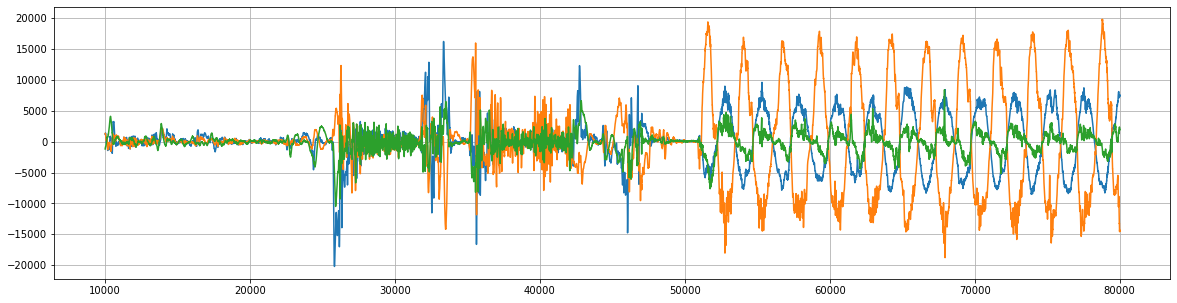

In [3]:
plt.figure(figsize=(20,5))
plt.plot(df['o1x'][10000:80000])
plt.plot(df['o1y'][10000:80000])
plt.plot(df['o1z'][10000:80000])
plt.grid()

□1-2-2. **計測初期**の，**センサ1**の筋電位のグラフ（10〜80s）

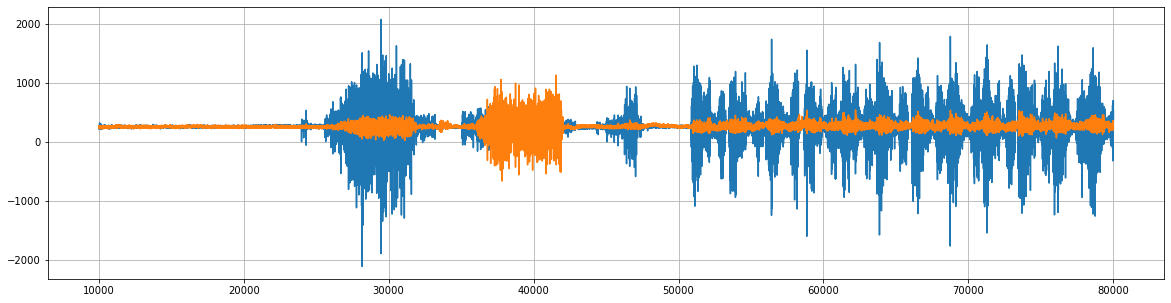

In [4]:
plt.figure(figsize=(20,5))
plt.plot(df['ch11'][10000:80000])
plt.plot(df['ch12'][10000:80000])
plt.grid()

□1-2-3. **計測初期**の，**センサ2**の角速度のグラフ（10〜80s）

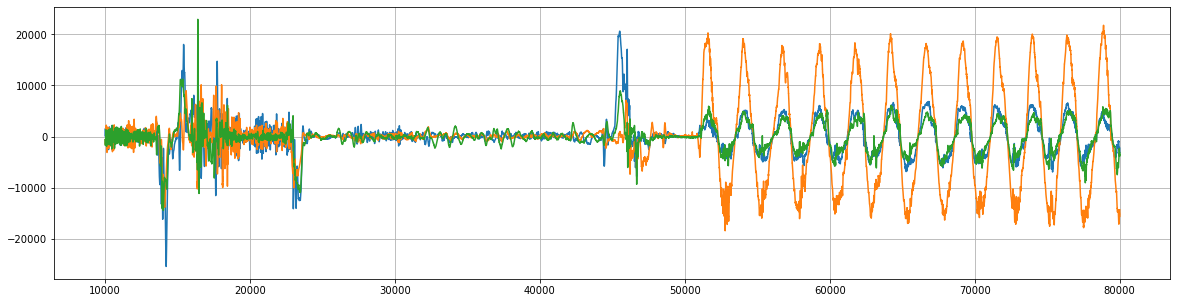

In [5]:
plt.figure(figsize=(20,5))
plt.plot(df['o2x'][10000:80000])
plt.plot(df['o2y'][10000:80000])
plt.plot(df['o2z'][10000:80000])
plt.grid()

□1-2-4. **計測初期**の，**センサ2**の筋電位のグラフ（10〜80s）

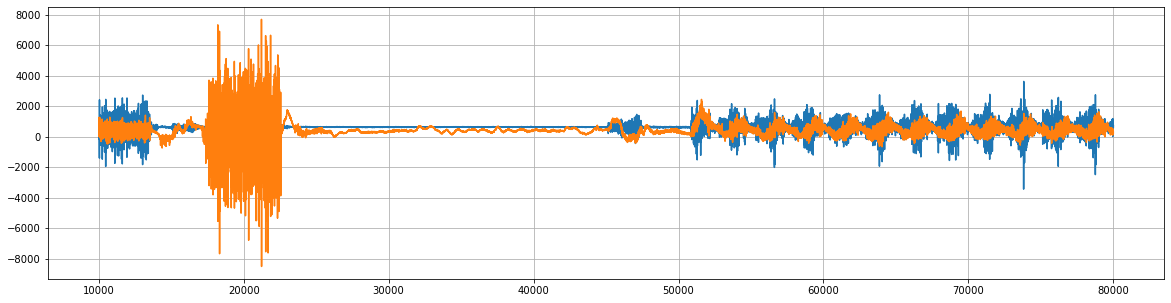

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df['ch21'][10000:80000])
plt.plot(df['ch22'][10000:80000])
plt.grid()

> 以上から，センサ1と2の両方において，60000ms（60s）以降では確実に運動も筋電位差も安定的なことがわかる。

□1-2-5. **計測終了期**の，**センサ1**の角速度のグラフ（200s〜）

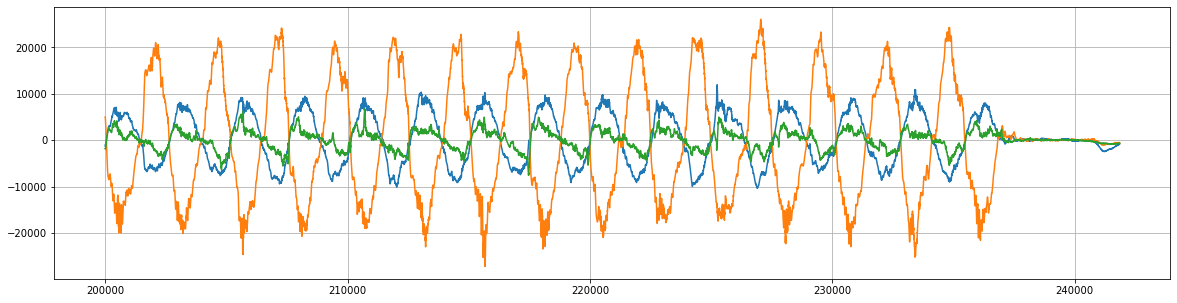

In [7]:
plt.figure(figsize=(20,5))
plt.plot(df['o1x'][200000:])
plt.plot(df['o1y'][200000:])
plt.plot(df['o1z'][200000:])
plt.grid()

□1-2-6. **計測終了期**の，**センサ1**の筋電位のグラフ（200s〜）

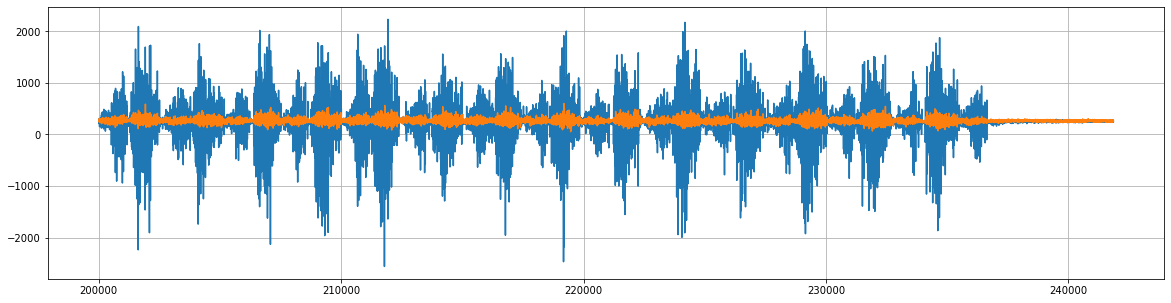

In [8]:
plt.figure(figsize=(20,5))
plt.plot(df['ch11'][200000:])
plt.plot(df['ch12'][200000:])
plt.grid()

□1-2-7. **計測初期**の，**センサ2**の角速度のグラフ（200s〜）

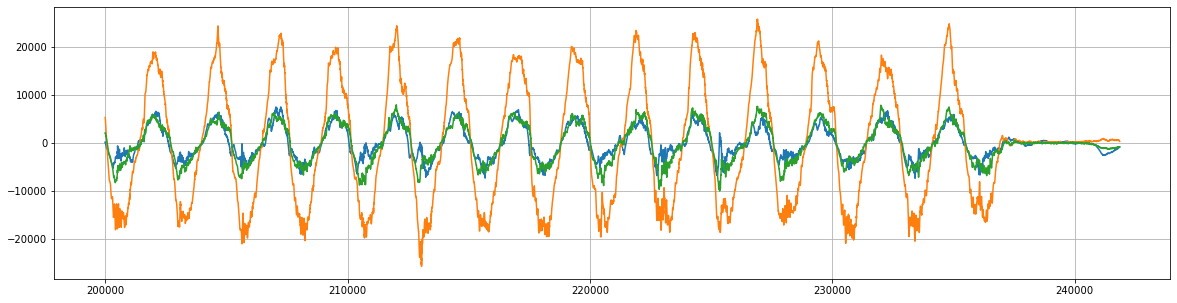

In [9]:
plt.figure(figsize=(20,5))
plt.plot(df['o2x'][200000:])
plt.plot(df['o2y'][200000:])
plt.plot(df['o2z'][200000:])
plt.grid()

□1-2-8. **計測終了期**の，**センサ2**の筋電位のグラフ（200s〜）

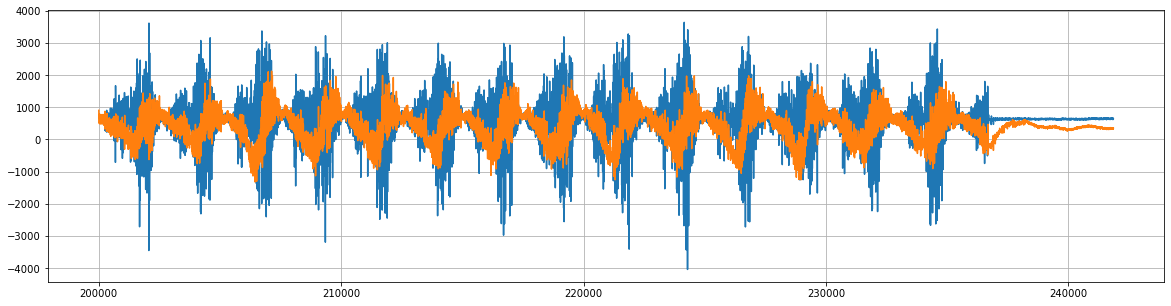

In [10]:
plt.figure(figsize=(20,5))
plt.plot(df['ch21'][200000:])
plt.plot(df['ch22'][200000:])
plt.grid()

> 以上から，センサ1と2の両方において，230000ms（230s=18min50s）以前では確実に運動も筋電位差も安定的なことがわかる。

■1-3. 運動安定期（60000ms〜230000msを0ms〜170000msに置き換える）のセンサ1，センサ2の加速度，角速度，筋電位をそれぞれ`alpha1`, `alpha2`, `omega1`, `omega2`, `mep1`, `mep2` とする（mepはmyoelectric potentialの略とした）。それぞれの変数はリストになっており加速度・角速度については，インデックスの0がx成分，インデックスの1がy成分，インデックスの2がz成分とし，筋電位差については，インデックスの0が1ch，インデックスの1が2chとする。  
※）<a href="https://note.nkmk.me/python-pandas-numpy-conversion/">pandas.DataFrame, SeriesとNumPy配列ndarrayを相互に変換</a>を参照。

In [11]:
alpha1 = [
    df['a1x'].values[60000:230000],
    df['a1y'].values[60000:230000],
    df['a1z'].values[60000:230000]
]

alpha2 = [
    df['a2x'].values[60000:230000],
    df['a2y'].values[60000:230000],
    df['a2z'].values[60000:230000]    
]

omega1 = [
    df['o1x'].values[60000:230000],
    df['o1y'].values[60000:230000],
    df['o1z'].values[60000:230000]
]

omega2 = [
    df['o2x'].values[60000:230000],
    df['o2y'].values[60000:230000],
    df['o2z'].values[60000:230000]
]

mep1 = [
    df['ch11'].values[60000:230000],
    df['ch12'].values[60000:230000]
]

mep2 = [
    df['ch21'].values[60000:230000],
    df['ch22'].values[60000:230000]
]

### 2. グラフ化例

角速度と電位差のように単位の異なる物理量を，ひとつのグラフ内に描くには，それらの物理量を標準化（やここではやらないが正規化）しておく必要がある。ここでは角速度と筋電位差の標準化を行い，変動のパターンを調べてみる。  
※）例えば，<a href="http://www.gifu-nct.ac.jp/elec/deguchi/sotsuron/watanabe/node28.html">データの標準化</a>または<a href="https://aiacademy.jp/texts/show/?id=555">標準化と正規化</a>などを読め。

z値を求めるには，配布した actTools モジュールにある`z_`という関数を用いる：
```
z_(arr)
```
で，1darrayデータ`arr`のz値を返す（actTools モジュールの中にはデータを正規化する`n_`という関数も含まれるが，今回は使わない）。

■2-1. センサ1の角速度のy成分と，同センサのch1とch２の筋電位差を標準化および正規化して，グラフ化する。

□2-1-1. 10000msごとのグラフを描きたいので，つぎのようなndarrayを作成しておく。

In [12]:
itime = np.arange(0, 160001, 10000)
ftime = np.arange(10000, 170001, 10000)
print(itime)
print(ftime)

[     0  10000  20000  30000  40000  50000  60000  70000  80000  90000
 100000 110000 120000 130000 140000 150000 160000]
[ 10000  20000  30000  40000  50000  60000  70000  80000  90000 100000
 110000 120000 130000 140000 150000 160000 170000]


■2-2. **標準化**された角速度のy成分と，筋電位差の時系列グラフを描く。ただし，グラフの見やすさを考慮して，ch1とch２の筋電位差，角速度のy成分の順にグラフを描く。

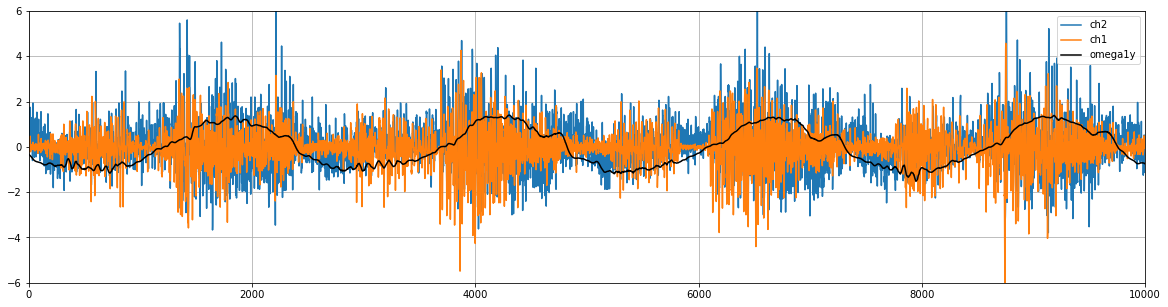

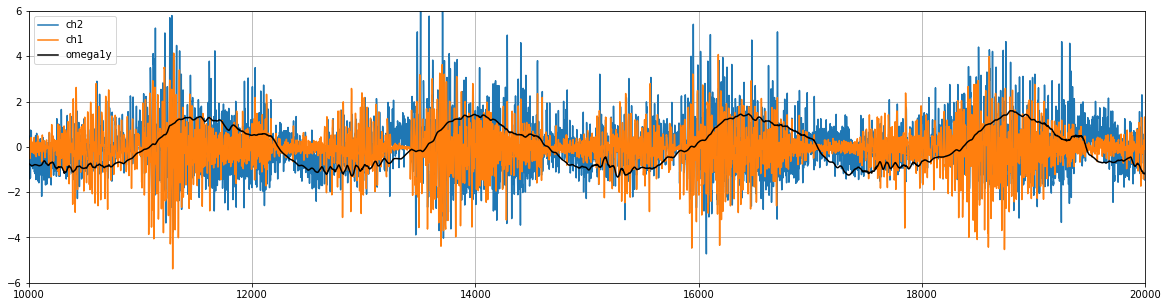

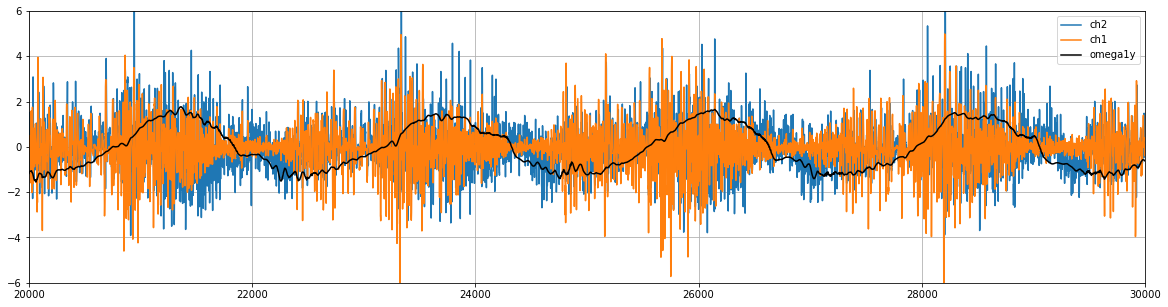

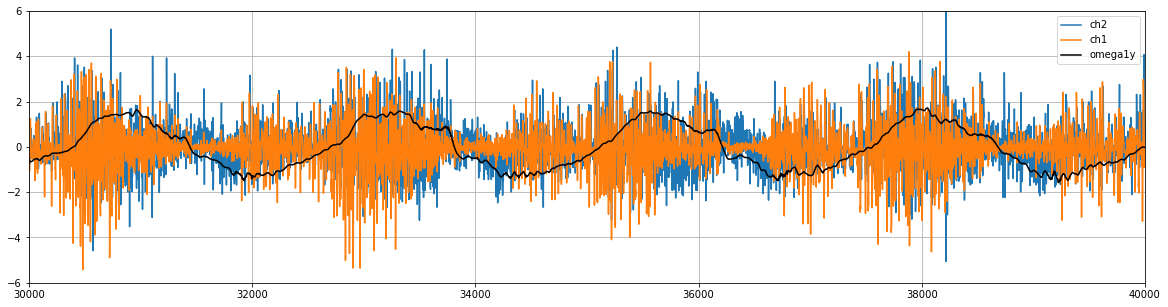

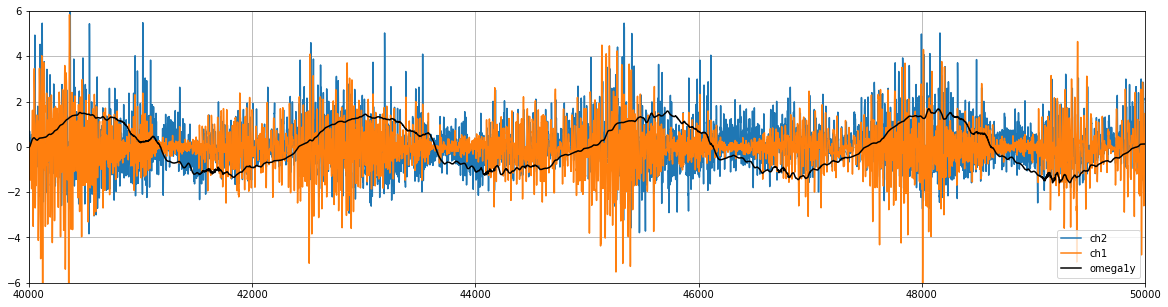

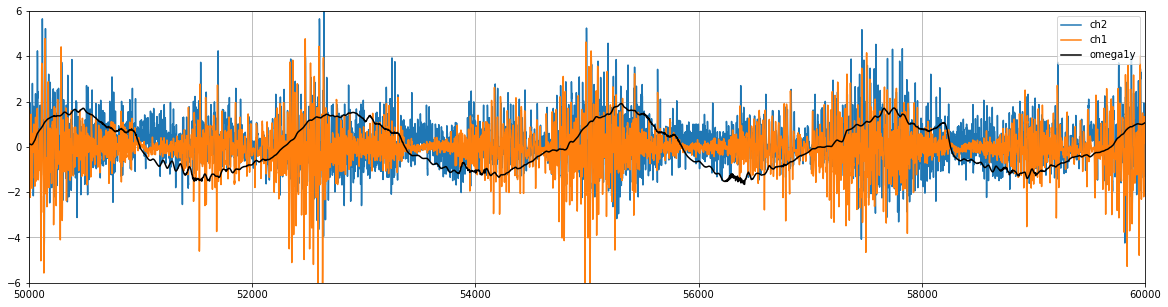

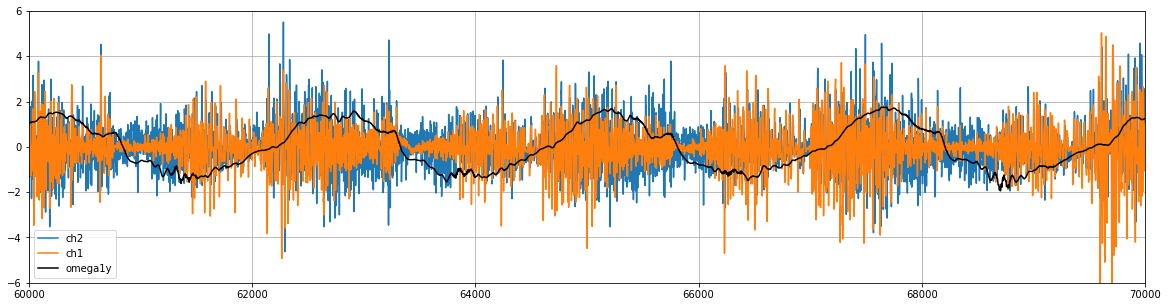

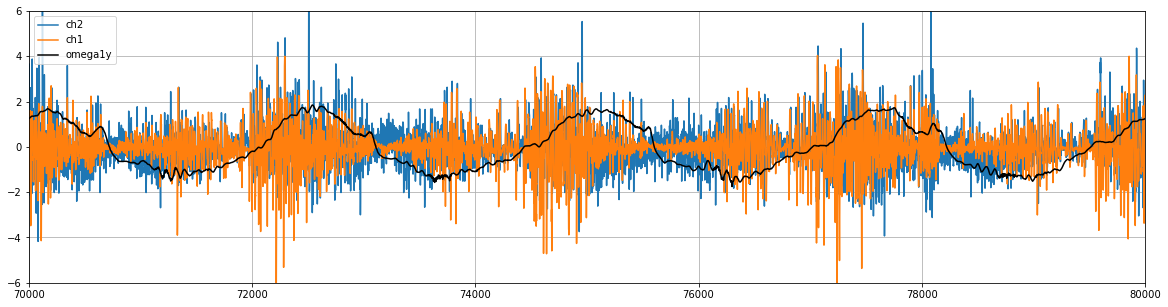

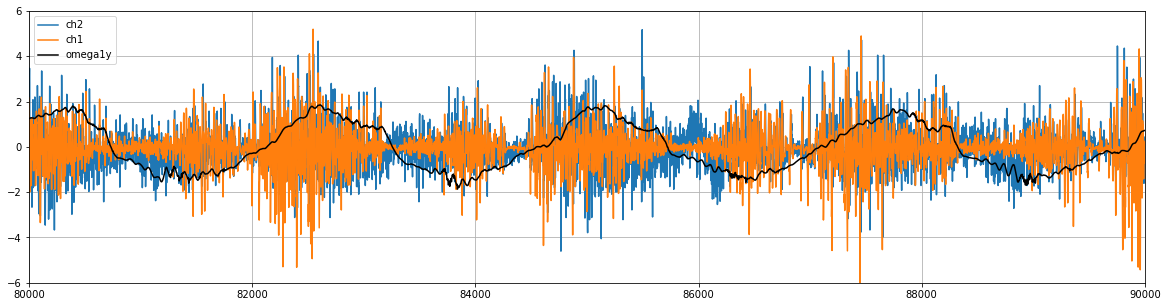

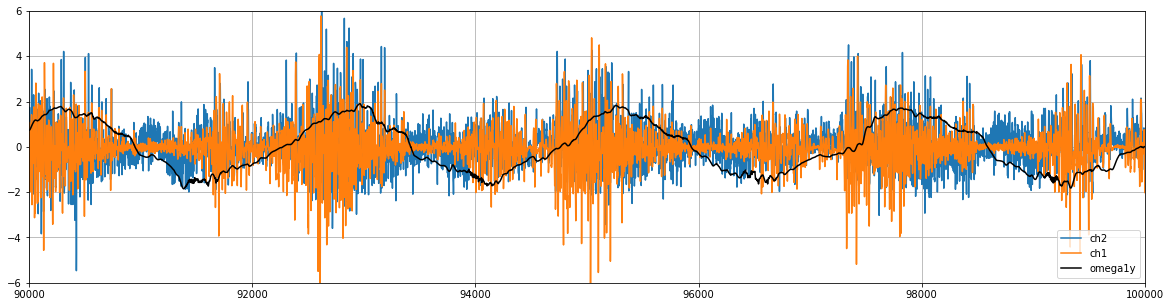

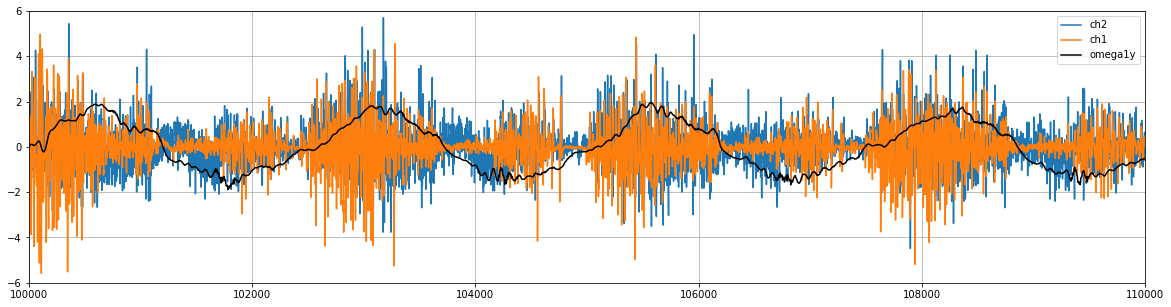

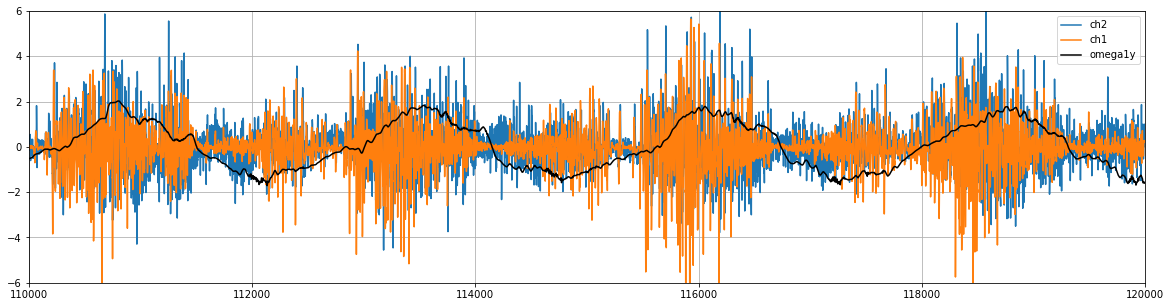

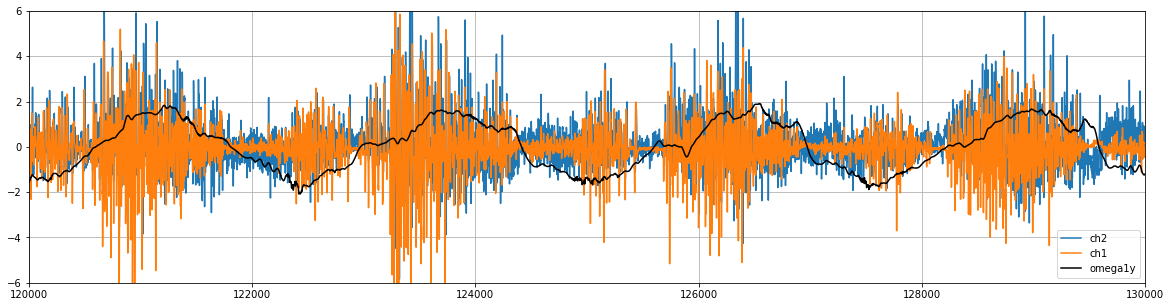

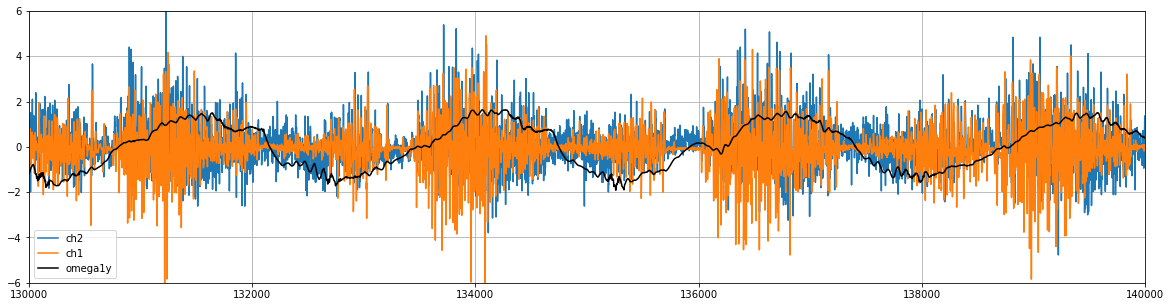

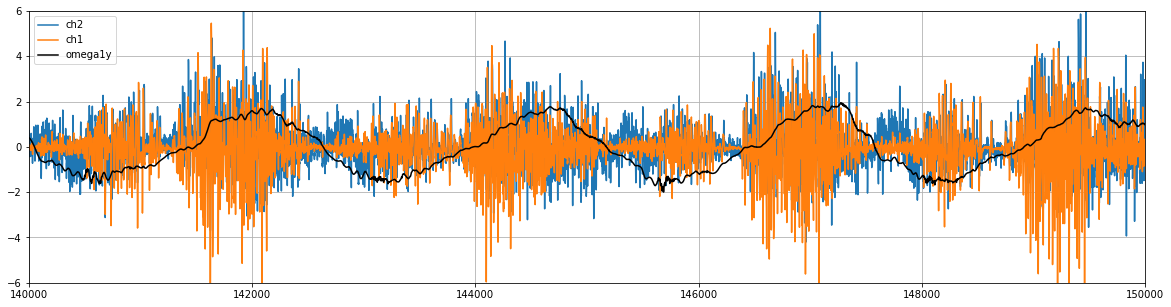

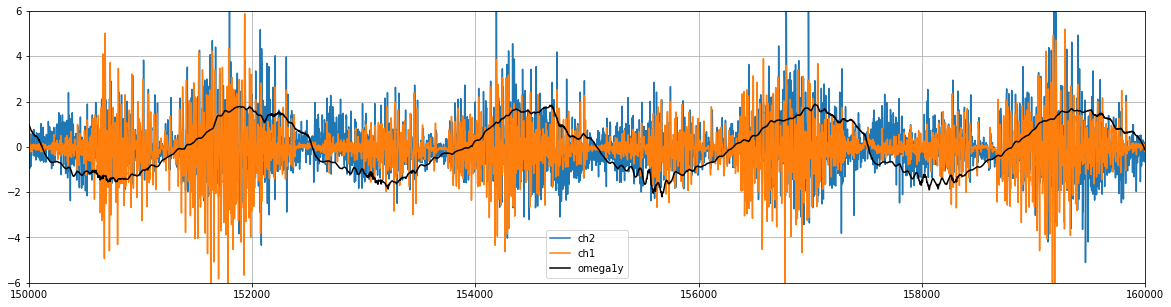

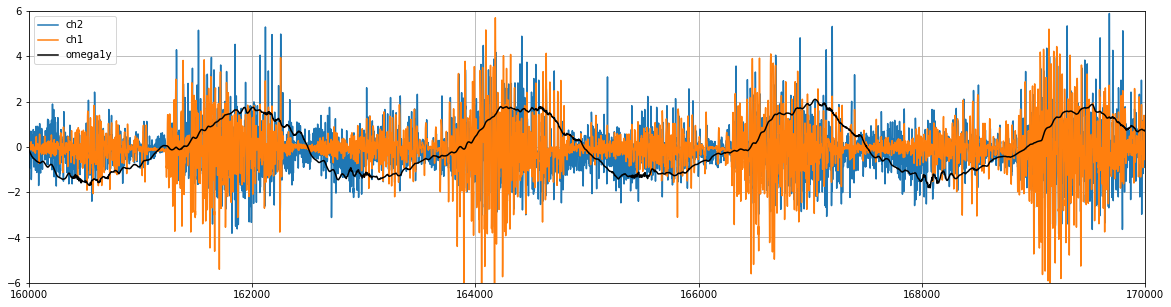

In [13]:
for i, j in zip(itime, ftime):
    plt.figure(figsize=(20,5))
    plt.plot(np.arange(i,j), z_(mep1[1])[i:j])
    plt.plot(np.arange(i,j), z_(mep1[0])[i:j])
    plt.plot(np.arange(i,j), z_(omega1[1])[i:j], c="black")
    plt.legend(['ch2','ch1','omega1y'])
    plt.xlim(i, j)
    plt.ylim(-6, 6)
    plt.grid()

> 角速度（のy成分）と筋電位差ほぼ同期しているが，特に角速度が正の場合に，ch1の筋電位差とch2の筋電位差がより大きく振れる傾向があるようだ。

### 3. 平均パワー周波数による周波数解析

このセクションでは，筋電位差の周波数，特に**平均パワー周波数 (Mean Power Frequency)**（平均周波数）と角速度の関係を調べてみる。周波数解析をするには**フーリエ変換**というものを勉強しなければならないが，詳細はまあいいだろう。フーリエ変換というのは，簡単に言えば，いろいろな周波数の波で構成された合成波を，各周波数別にに分解する数学的方法である。例えば，昼間の太陽光はいろいろな周波数の光波の合成波である。太陽光をプリズムに通すと，（赤外から可視光の）赤から紫（そして紫外）の光へ分解され，目に見える範囲では，虹が見える。虹は「自然のプリズム（雨粒）」を通した太陽光の周波数分解と思えばよい。虹の中で，もし，赤色が濃く出ているときは，赤色に対応した周波数の光波の強度が強いことになり，青色が濃いときには青色に対応した周波数の光波の強度が強いことになる。このような，強度を**パワー**とよぶ。

平均パワー周波数（以下MPFと記す）というのは，データをフーリエ変換（周波数分解）したとき，各周波数にそれのパワー（強度）を掛けてを総和した量を全パワーの総和で割ったものであり，データの**平均の周波数**と考えることができる。この操作を各時刻で行う関数が，actTools モジュールにある`mpf_array`関数で,
```
mpf_array(arr)
```
と実行すると，1darrayデータ`arr`の各時刻のMPFを得ることができる。

■3-1. センサ1のch1とch2の平均パワー周波数の時系列データを求め，それぞれ変数`mpf1`と`mpf2`に格納する（計算に少し時間がかかるので注意）：

In [14]:
mpf1 = mpf_array(mep1[0])
mpf2 = mpf_array(mep1[1])

■3-2. `mpf1`と`mpf2`をプロットしてみる：

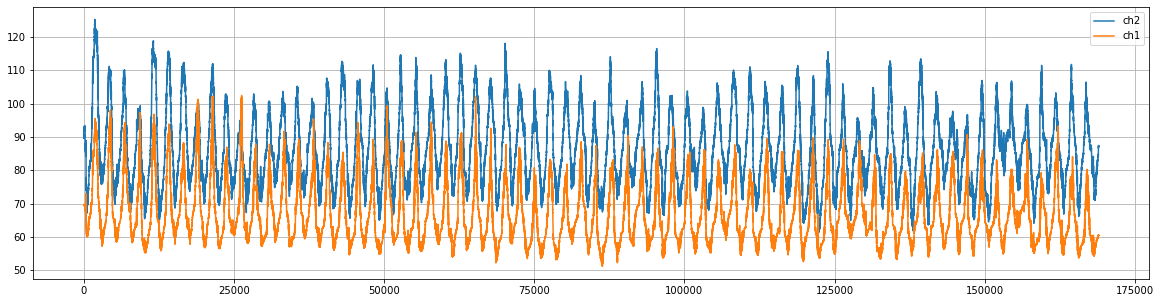

In [15]:
plt.figure(figsize=(20,5))
plt.plot(mpf2)
plt.plot(mpf1)
plt.legend(['ch2','ch1'])
plt.grid()

> MPFはch1よりch2の方が大きいようだ（筋電位差を計測している**筋が異なるからだ**）。  
> ※）尻切れトンボになるのは，（コンピュータでの）フーリエ変換のアルゴリズム上の理由。

■3-3. 上のグラフを1000msごとに切って，MPFをもう少し詳しく表示してみる。

□3-3-1. 上のグラフが尻切れトンボになっているので，□2-1-1で設定したitimeとftimeを次のように変更しておく。

In [16]:
itime1 = np.delete(itime, -1)
ftime1 = np.delete(ftime, -1)

□3-3-2. 1000msごとのch1とch2のMPFのグラフを描く。

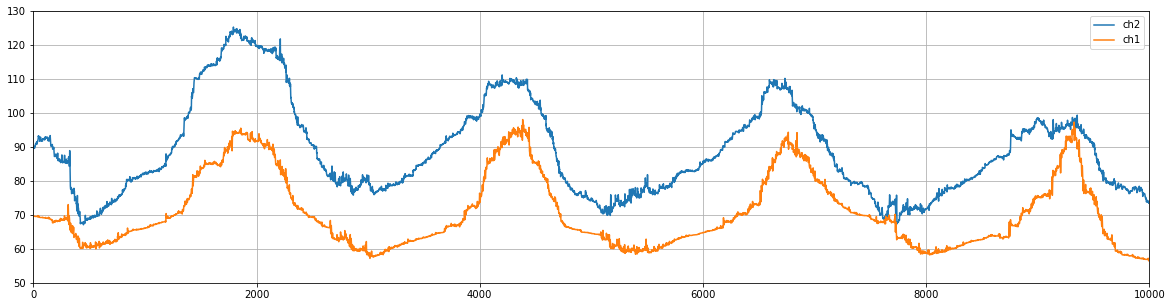

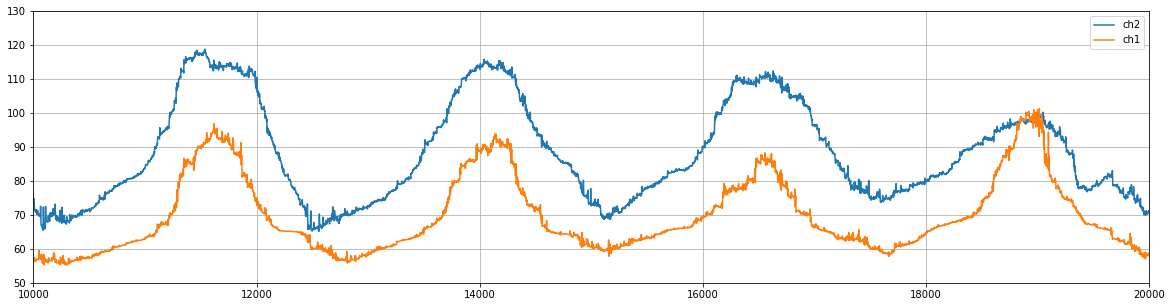

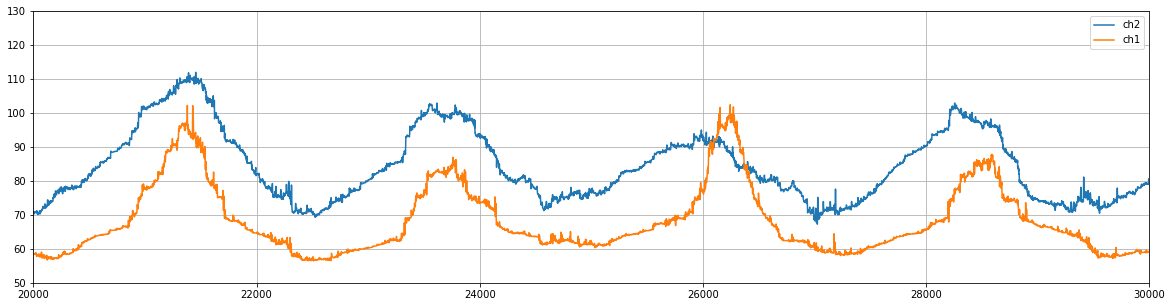

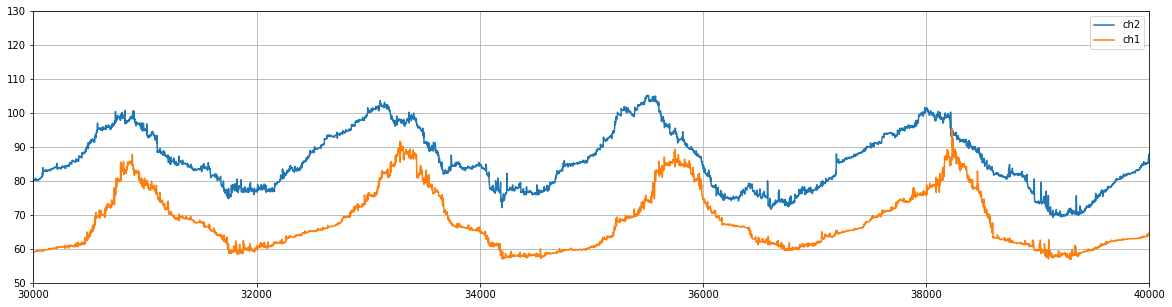

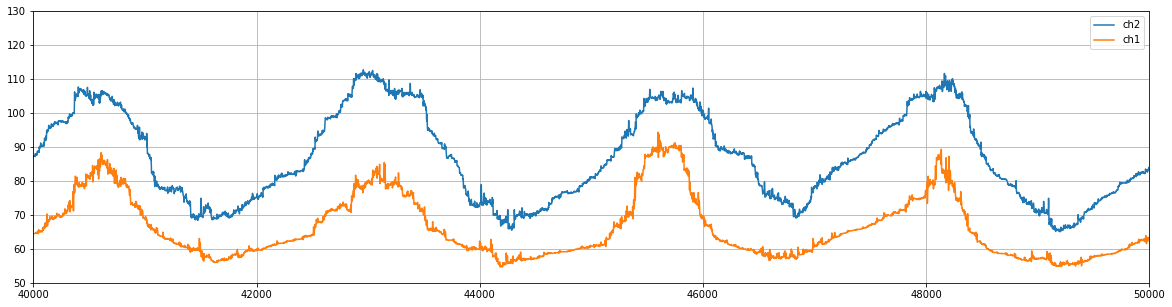

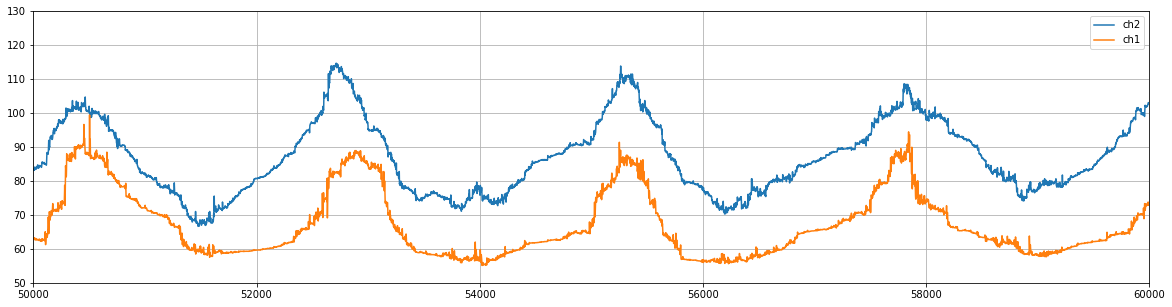

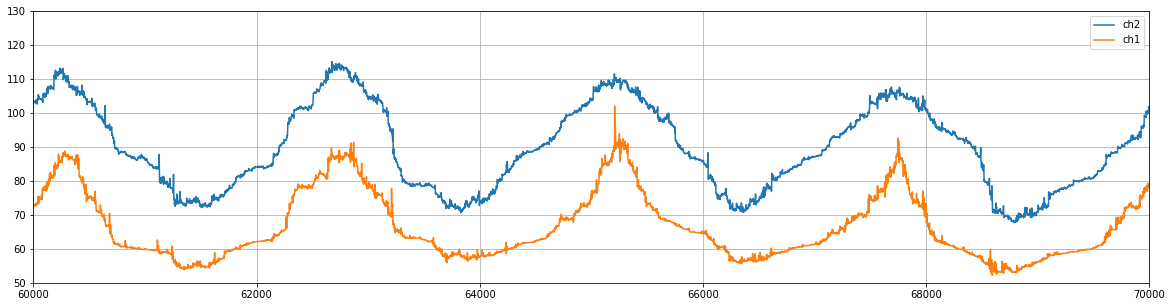

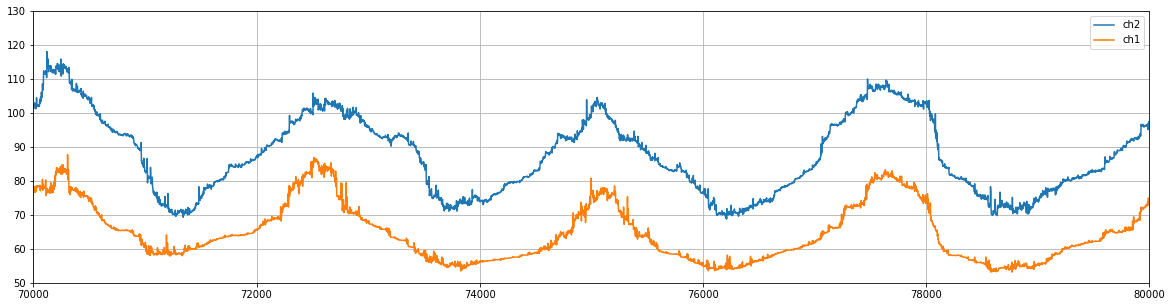

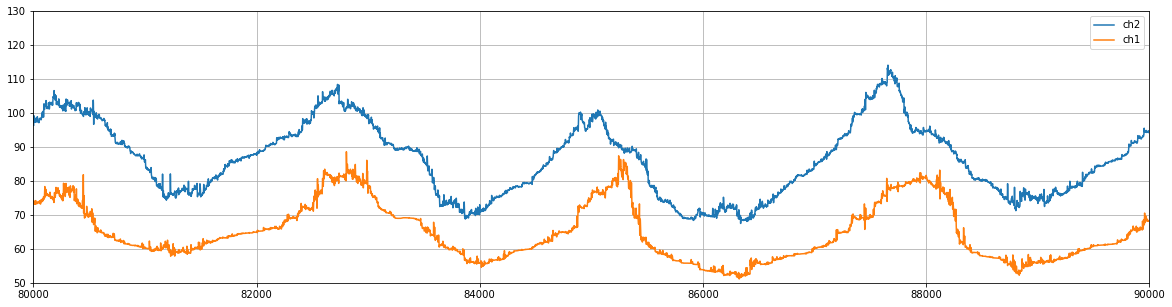

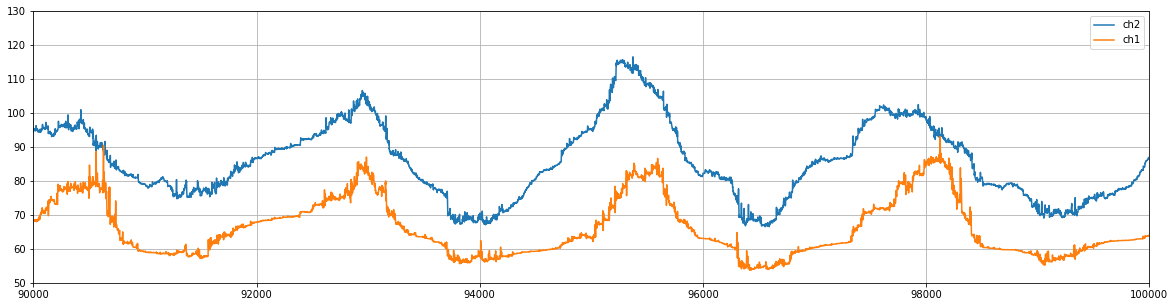

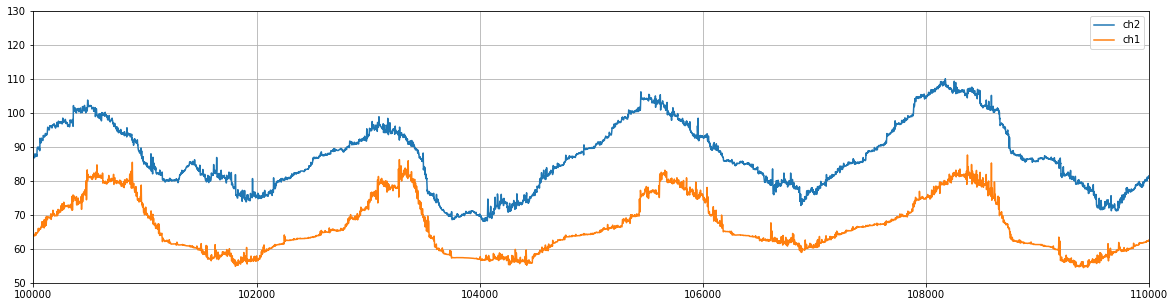

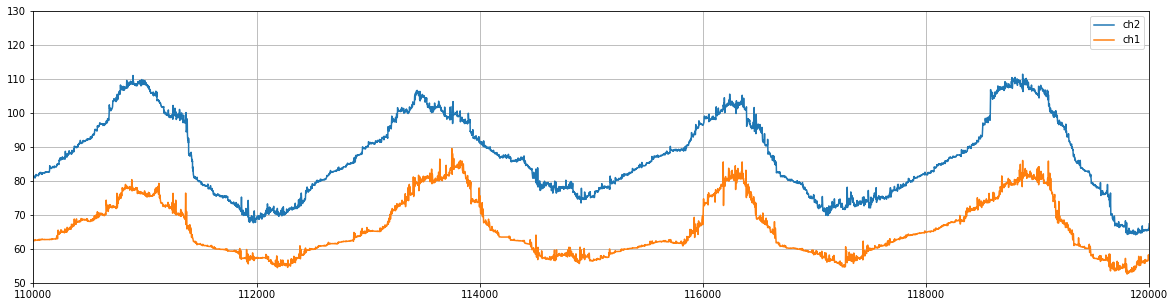

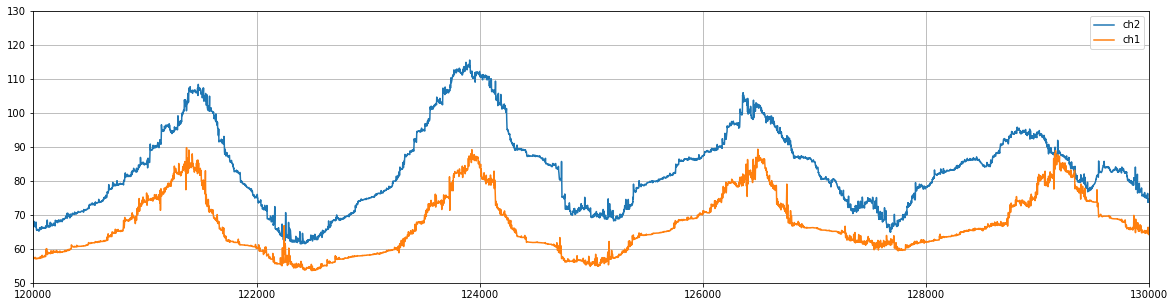

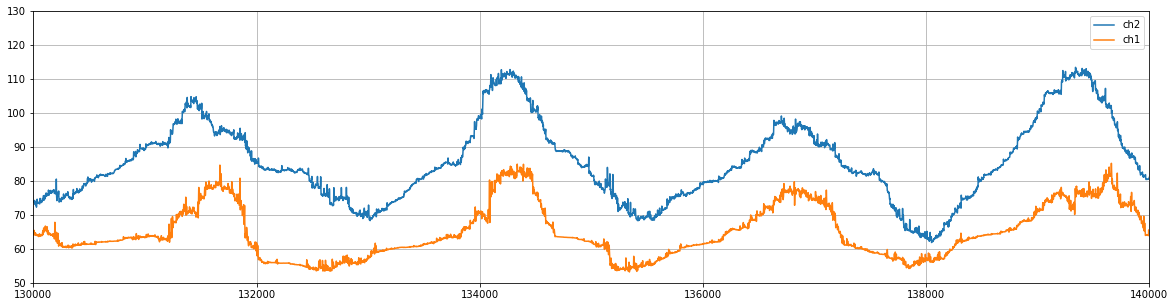

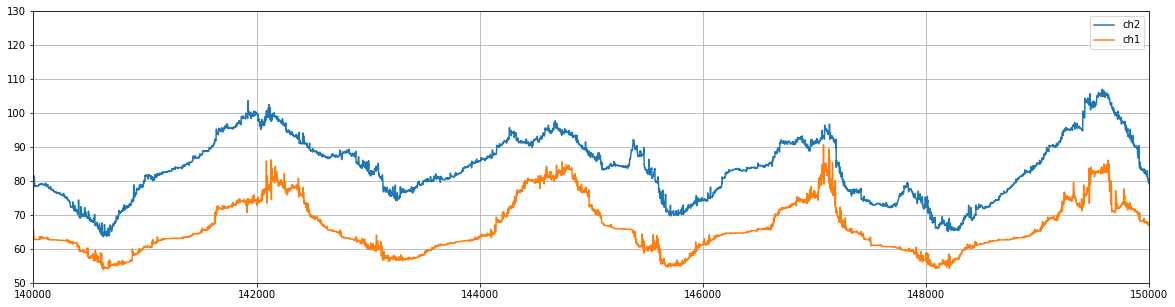

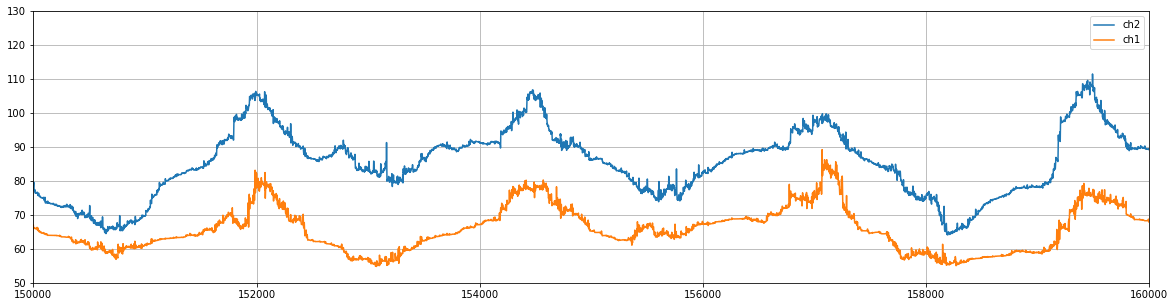

In [17]:
for i, j in zip(itime, ftime1):
    plt.figure(figsize=(20,5))
    plt.plot(np.arange(i,j), mpf2[i:j])
    plt.plot(np.arange(i,j), mpf1[i:j])
    plt.legend(['ch2','ch1'])
    plt.xlim(i, j)
    plt.ylim(50, 130)
    plt.grid()

> どうやら，時間が経つにつれて，両MPFは全体的に減少していくようにみえる。

■3-4. 時間が経つにつれて，両MPFは**全体的に減少**していくことを確かめるために，両MPFの回帰直線を描いてみる。

□3-4-1. まず回帰直線 $y = ax + b$ の係数 $a, \ b$を求める。

In [18]:
a1, b1 = np.polyfit(np.arange(len(mpf1)), mpf1, 1)
a2, b2 = np.polyfit(np.arange(len(mpf2)), mpf2, 1)
print(f'a1 = {a1},   b1 = {b1}')
print(f'a2 = {a2},   b2 = {b2}')

a1 = -2.6650805351060417e-05,   b1 = 68.80727846858302
a2 = -2.0387435381844302e-05,   b2 = 87.97028613176796


> 直線の傾き`a1`，`a2`は非常に小さいが（ms単位なのでs単位に直すには1000倍せよ ... それでも小さいが），負の値を取っているので，両MPFは全体的として，時間的に減少傾向にある。

□3-4-2. 両MPFとそれらの回帰直線のグラフを作ってみる。

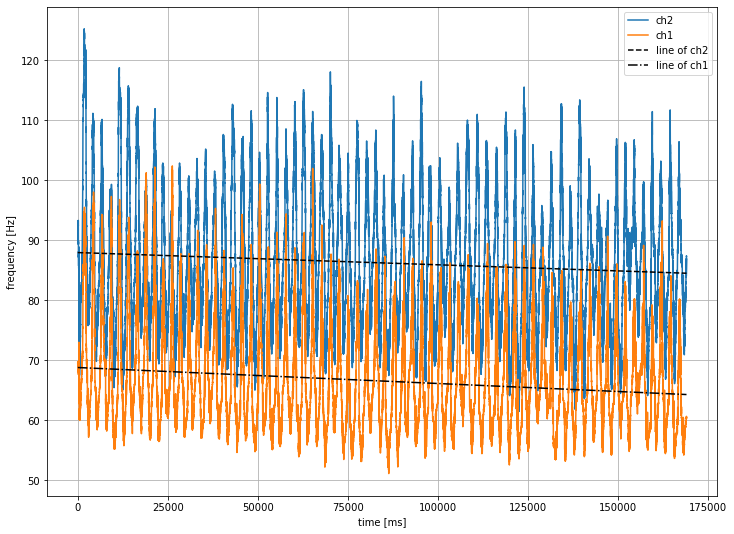

In [19]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(len(mpf1)), mpf2)
plt.plot(np.arange(len(mpf1)), mpf1)
plt.plot( a2 * np.arange(len(mpf2)) + b2, '--', c="black")
plt.plot( a1 * np.arange(len(mpf1)) + b1, '-.', c="black")
plt.legend(['ch2','ch1', 'line of ch2', 'line of ch1'])
plt.ylabel("frequency [Hz]")
plt.xlabel("time [ms]")
plt.grid()

> 確かに，両MPFは全体的として，時間的に減少傾向にあるようだ。

■3-5. 次は，ch1，ch2のMPFと角速度の関係を示すグラフを1000msごとに区切って描いてみる。ただし，単位が異なるものを１つのグラフ内に示すのだから，これらのデータのz値をとったグラフを作る。

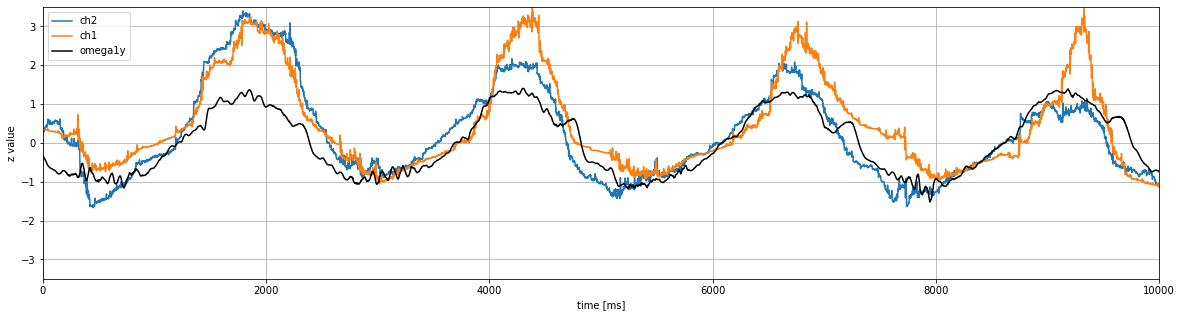

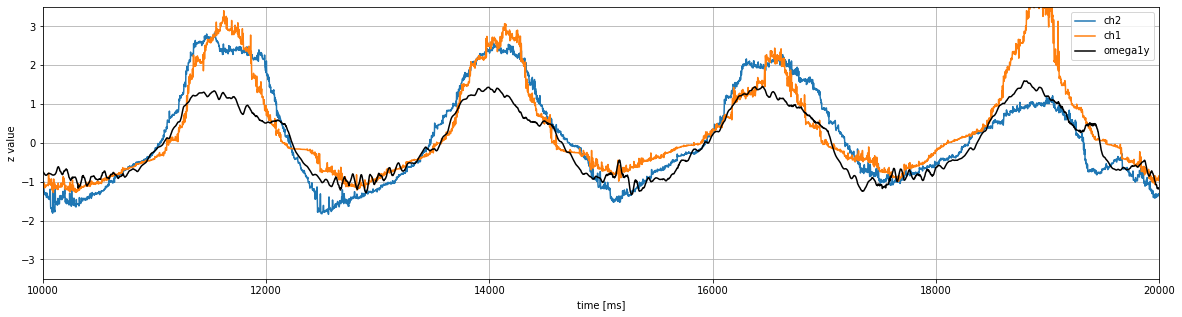

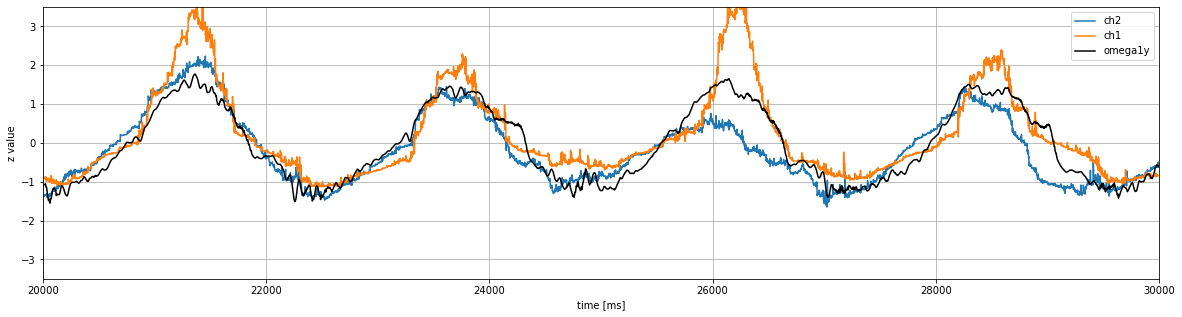

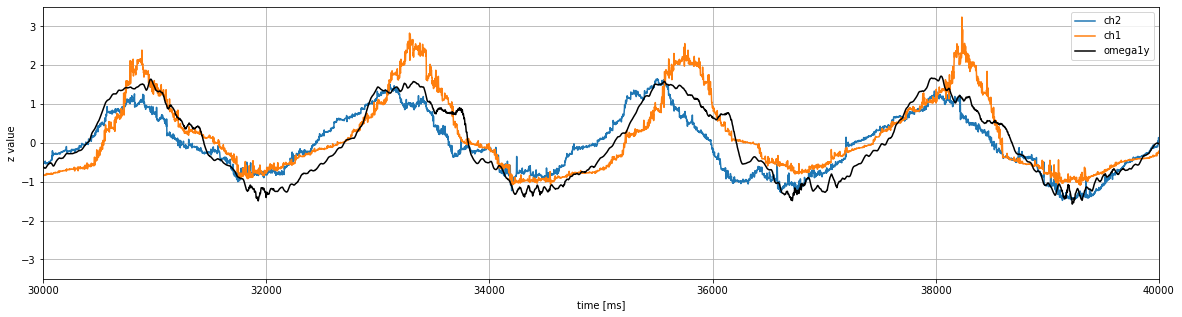

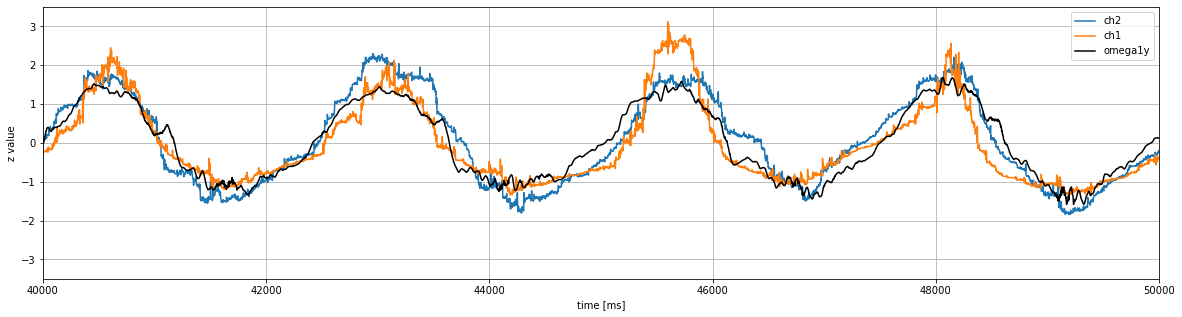

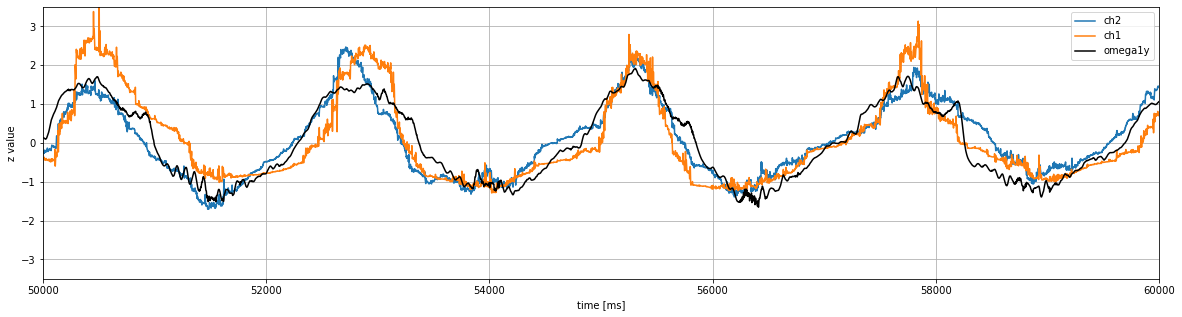

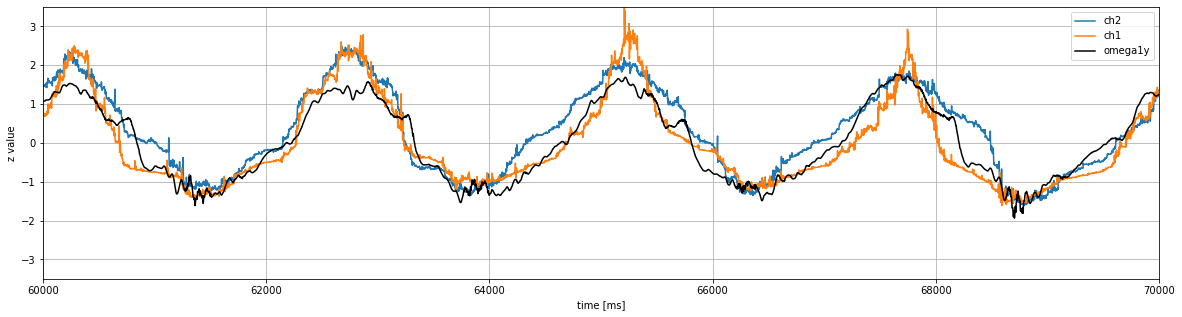

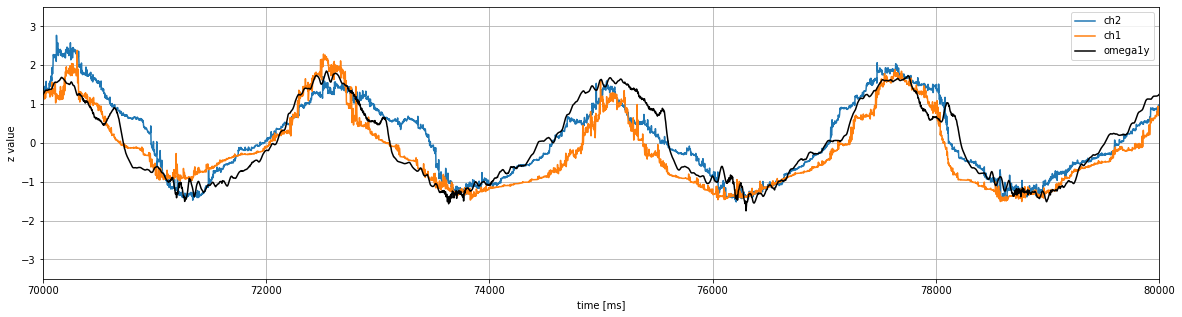

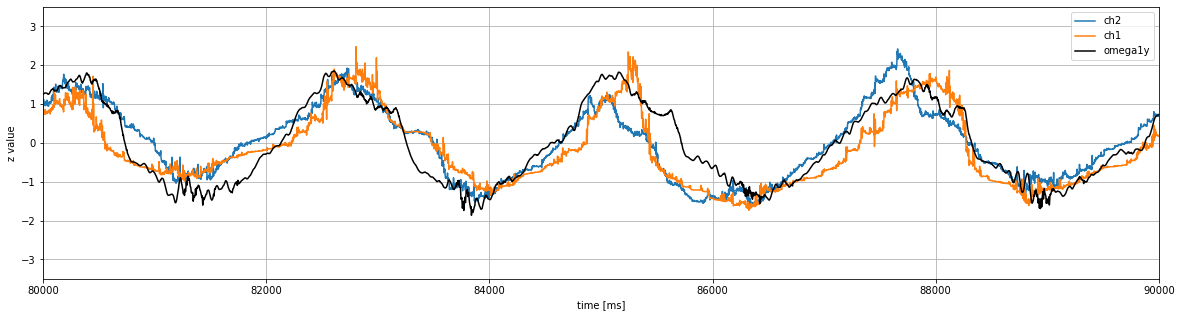

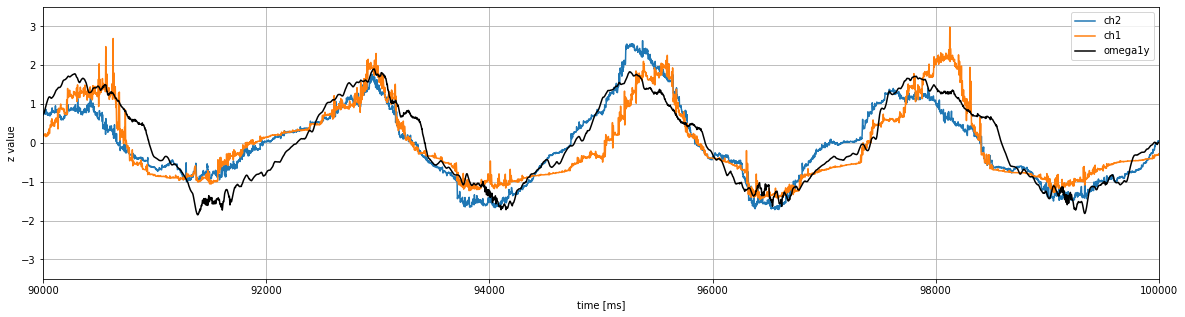

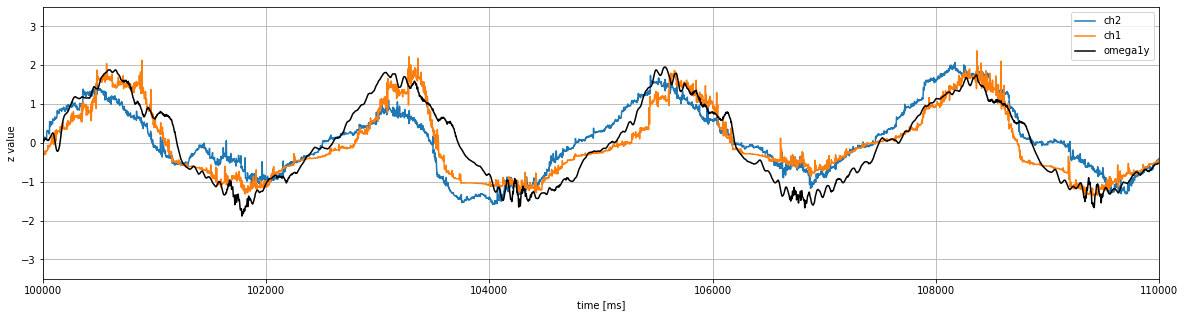

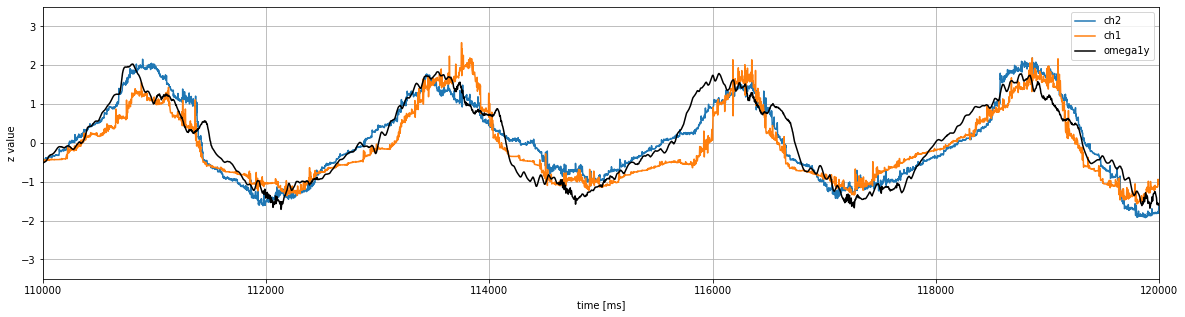

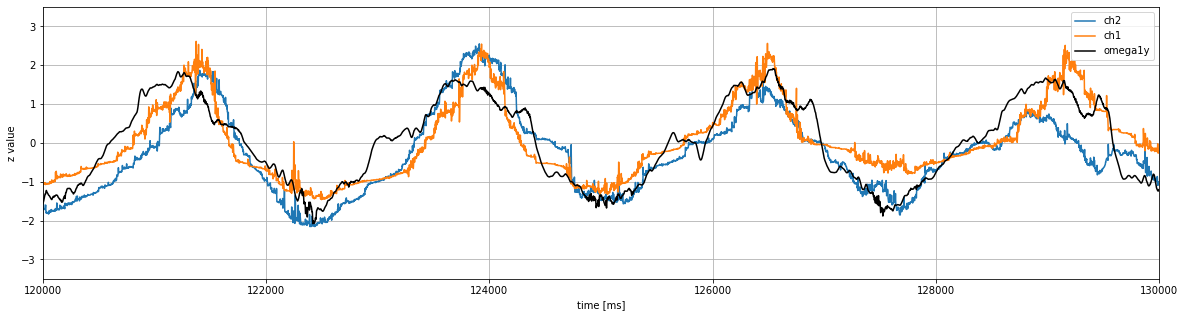

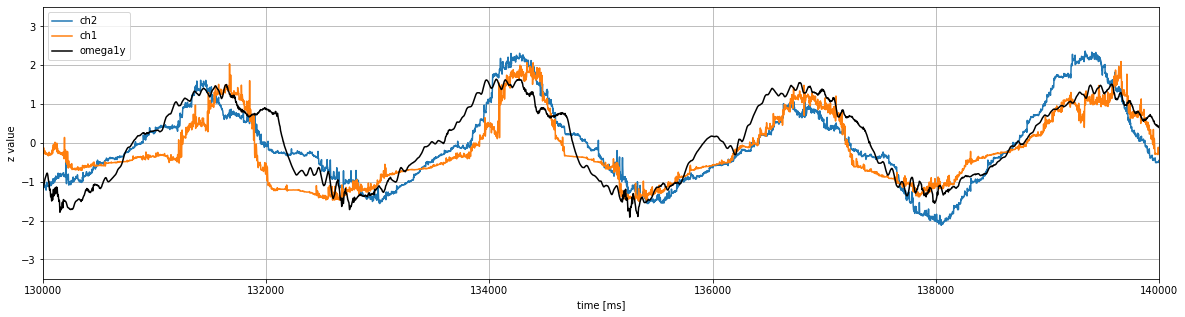

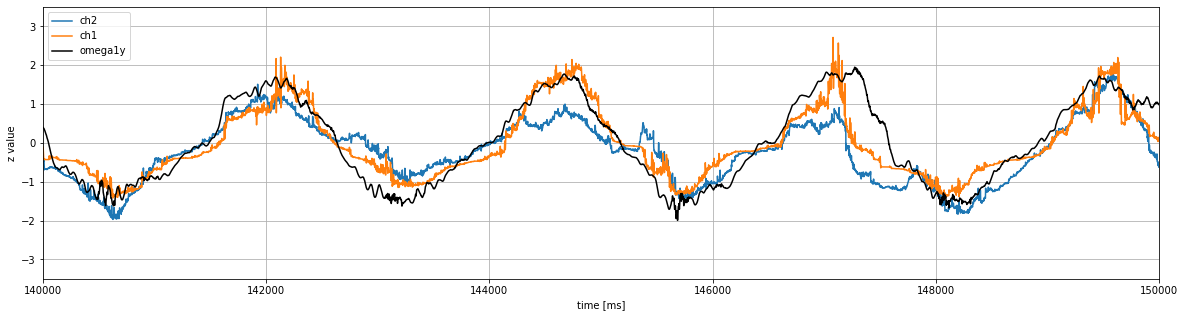

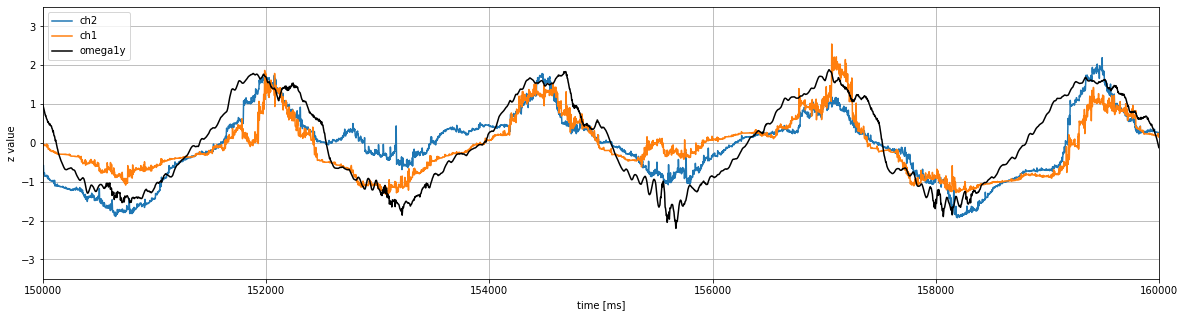

In [20]:
for i, j in zip(itime, ftime1):
    plt.figure(figsize=(20,5))
    plt.plot(np.arange(i,j), z_(mpf2)[i:j])
    plt.plot(np.arange(i,j), z_(mpf1)[i:j])
    plt.plot(np.arange(i,j), z_(omega1[1])[i:j], c="black")
    plt.legend(['ch2','ch1','omega1y'])
    plt.xlim(i, j)
    plt.ylim(-3.5,3.5)
    plt.xlabel("time [ms]")
    plt.ylabel("z value")
    plt.grid()

> 両MPFと角速度（のy成分）は完全に同期している。これはどういうことだろうか？